In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append('/home3/ebrahim/isr/')
from RNNcell import RNN_one_layer, RNN_two_layers
from datasets import OneHotLetters, OneHotLetters_test
from run_test_trials import run_test_trials
from simulation_one import simulation_one
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import numpy as np
import wandb
device = torch.device("cpu")
import seaborn as sns
import scipy
from sklearn.decomposition import PCA
from torch.utils.data import Dataset
import pickle
import pandas as pd

In [10]:
# load model
base = '/home3/ebrahim/isr/'
modelPATH = 'saved_models/feedback_onehot_26_SGD_noise_0.0_nobias/model_human.pth'
runPATH = "ebrahimfeghhi/isr/gd12r252"
api = wandb.Api()
run = api.run(runPATH)
config = run.config
saved_info = torch.load(base + modelPATH)
model = RNN_one_layer(config['num_letters']+1, config['hs'], config['num_letters']+1, noise_std=config['noise_std'],
                        feedback_bool=True, bias=False)
model.load_state_dict(saved_info['model_state_dict'])

<All keys matched successfully>

In [11]:
# Run sim_one_code
sim_one = simulation_one(model, 9, 0.5, 6, fb_type=1)
sim_one.run_model(device, 6, config, base='/home3/ebrahim/isr/')
print(sim_one.relative_error_ratio)
print(sim_one.R_E)
print(sim_one.R_T)
print(sim_one.ARD)
print(sim_one.relative_errors_subset)
print(sim_one.fill_in_errors / sim_one.report_early)
print(sim_one.relative_errors_subset / sim_one.report_early)

0.106
0.066
0.072
3.695
393
0.8092554138237912
0.11658261643429249


In [12]:
y_hat_recall = sim_one.y_hat_recall
y_recall = sim_one.y_test_recall
h_stacked = sim_one.h_stacked

trials_pos1_error = np.argwhere(y_hat_recall[:, 0]!=y_recall[:, 0]).squeeze()
print(f"Number of trials with error at position 1: {trials_pos1_error.shape[0]}")



Number of trials with error at position 1: 772


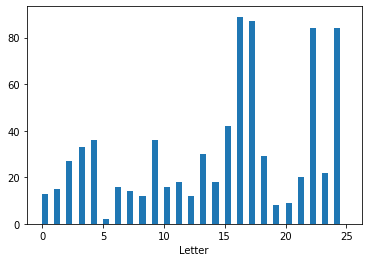

In [22]:
# are certain letters more likely to be recalled incorrectly at position 1
y_recall_error_pos1 = y_recall[trials_pos1_error]
plt.hist(y_recall_error_pos1[:, 0], width=0.5, bins=np.arange(0,26))
plt.xlabel("Letter")
plt.show()

y_hat_recall_error_pos1 = y_hat_recall[trials_pos1_error]
plt.hist(y_hat_recall_error_pos1 [:, 0], width=0.5, bins=np.arange(0,26))
plt.xlabel("Letter")
plt.show()
